In [556]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [557]:
df = pd.read_csv('datasets/train.csv')

In [558]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [560]:
(df.columns)

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

### modification of column names

In [561]:
df.columns = [col.lower() for col in df.columns]

In [562]:
df.columns = [col.replace(' ', '_') for col in df.columns]

In [563]:
df.rename(columns={'3ssn_porch':'ssn3_porch', 
                   '2nd_flr_sf': 'flr2nd_sf'},inplace=True)

In [564]:
df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       'flr2nd_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'ga

In [565]:
df.isnull().sum()# missing values per column

id                0
pid               0
ms_subclass       0
ms_zoning         0
lot_frontage    330
               ... 
misc_val          0
mo_sold           0
yr_sold           0
sale_type         0
saleprice         0
Length: 81, dtype: int64

In [566]:
df.isnull().sum().sum() #total number of missing values

9822

### ms_subclass-Nominal

In [567]:
#from data dictionary provided
values_for_ms_subclass = ('020','030','040','045','045','050','060','070','075','080','085','090','120','150','160','180','190')

In [568]:
df.ms_subclass = [str(entry) for entry in df.ms_subclass]

In [569]:
df.ms_subclass = ['0'+ entry if len(entry)==2 else entry for entry in df.ms_subclass]

**So ms_subclass has been modified as per data dictionary provided**

In [570]:
ms=sorted(df['ms_subclass'])

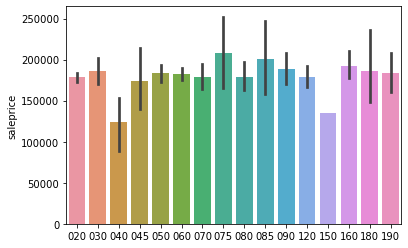

In [571]:
#bargraphs using seaborn
sns.barplot(x=ms, y= 'saleprice', data=df);

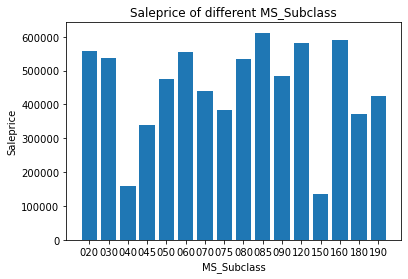

In [572]:
#bargraphs using matplotlib
plt.bar(sorted(df['ms_subclass']), df['saleprice'])
plt.xlabel('MS_Subclass')
plt.ylabel('Saleprice')
plt.title('Saleprice of different MS_Subclass' );

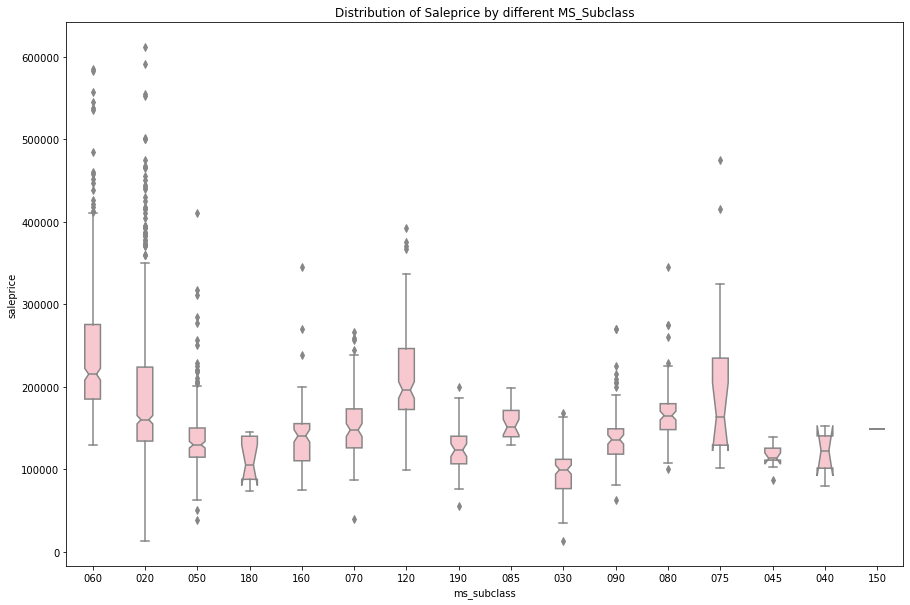

In [573]:
#boxplots using seaborn
fig=plt.subplots(figsize=(15,10))
sns.boxplot(y=df['saleprice'], x= df['ms_subclass'], data=df, color='pink',width=0.3, saturation=0.75, notch =True)
plt.title('Distribution of Saleprice by different MS_Subclass');

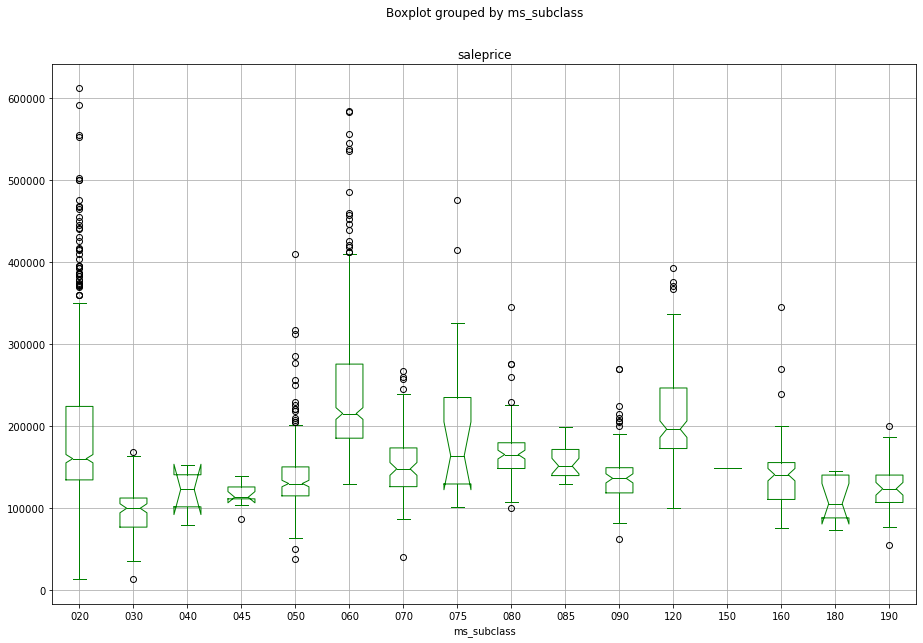

In [574]:
# boxplot using Pandas.boxplot
df.boxplot(column ='saleprice',by= 'ms_subclass',figsize=(15,10), color='green',notch=True );
#patch_artist=True,

### saleprice

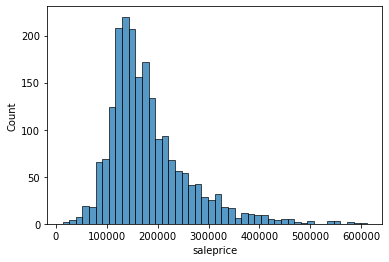

In [575]:
sns.histplot(df.saleprice);

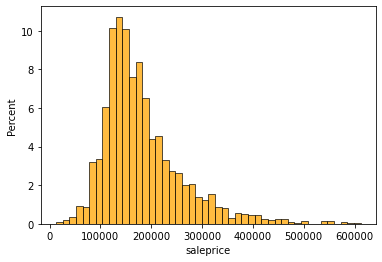

In [576]:
sns.histplot(df.saleprice, stat='percent', color='orange');

In [577]:
df.saleprice.isnull().sum() # No null values in the target column

0

### ms_zoning column- Nominal

In [578]:
df.ms_zoning.unique()

array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
      dtype=object)

In [579]:
df.ms_zoning.isnull().sum()# No null values in the column

0

In [580]:
df.ms_zoning.value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

In [581]:
df[df.ms_zoning=='RL'] 

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,060,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,060,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,020,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,060,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,050,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,020,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,030,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,050,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,020,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


**RL can be either residential or park as per data dictionary, not reflected here, to check**

In [582]:
dict_mszoning = {'C (all)':'C', 
                 'A (agr)':'A',
                 'I (all)':'I',
                 'RL':'RL',
                 'RM':'RM',
                 'FV':'FV',
                 'RH':'RH'}

In [583]:
df.ms_zoning = [dict_mszoning[entry] for entry in df.ms_zoning]#cleaned entries 

/var/folders/14/ql83cw_14pn_55xg8kg9ctcc0000gn/T/ipykernel_52037/2385313051.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(my_labels,
/var/folders/14/ql83cw_14pn_55xg8kg9ctcc0000gn/T/ipykernel_52037/2385313051.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(my_labels,


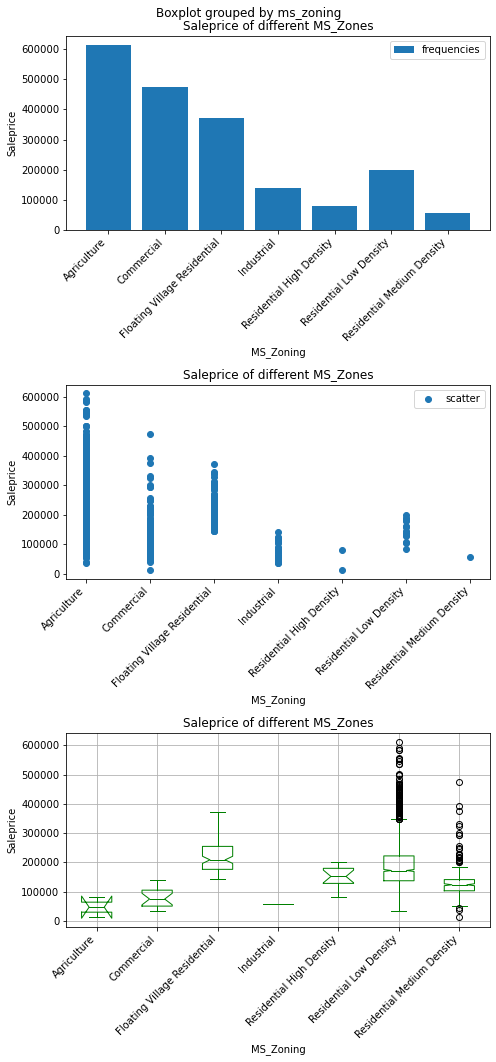

In [584]:
figure, ax = plt.subplots(3,1,figsize = (7,15))
my_labels= ['Agriculture','Commercial','Floating Village Residential','Industrial',
       'Residential High Density','Residential Low Density',
       'Residential Medium Density']
ax[0].bar(df['ms_zoning'], df['saleprice'],label='frequencies')
ax[0].set(xlabel='MS_Zoning',
          ylabel='Saleprice',
          title='Saleprice of different MS_Zones')
          
ax[0].set_xticklabels(my_labels,
                  rotation = 45,
                  horizontalalignment = 'right')

ax[0].legend()
ax[1].scatter(df['ms_zoning'], df['saleprice'],label='scatter')
ax[1].set(xlabel='MS_Zoning',
          ylabel='Saleprice',
          title='Saleprice of different MS_Zones')
ax[1].set_xticklabels(my_labels,
                  rotation = 45,
                  horizontalalignment = 'right')
          
ax[1].legend()
df.boxplot(column ='saleprice',by= 'ms_zoning',color='green',notch=True, ax=ax[2] );
ax[2].set(xlabel='MS_Zoning',
          ylabel='Saleprice',
          title='Saleprice of different MS_Zones')
ax[2].set_xticklabels(my_labels,
                  rotation = 45,
                  horizontalalignment = 'right')
# ax[2].legend()
# plt.xticks(my_labels, ha='right')
plt.tight_layout()
plt.show()

### lotfrontage-Continuous-Linear feet of street connected to property

In [585]:
df.lot_frontage.isnull().sum()

330

In [586]:
df.lot_frontage.unique()

array([ nan,  43.,  68.,  73.,  82., 137.,  35.,  70.,  21.,  64., 120.,
        24.,  74.,  93.,  34.,  80.,  71.,  72., 109.,  40., 103., 100.,
        92.,  65.,  75.,  60.,  30.,  79.,  41., 105., 107.,  81.,  36.,
        63.,  32.,  94.,  44.,  50.,  48.,  67.,  88.,  83.,  53.,  58.,
        57.,  52.,  87., 134.,  56.,  54., 140.,  78.,  85.,  90.,  96.,
        62.,  49.,  59., 155.,  91.,  61.,  86., 128.,  77.,  42.,  89.,
        51.,  69.,  55., 112.,  76., 125.,  98., 113., 102.,  22., 122.,
        84., 119., 118.,  66.,  95., 108., 195., 106.,  39., 110., 130.,
        97.,  45.,  37., 123.,  38., 129., 115.,  47., 114., 104.,  46.,
       121., 124., 313., 141., 101.,  99., 160., 174.,  26., 144., 138.,
       111.,  25.,  33., 200., 150., 117., 153., 116., 135.])

In [587]:
df.lot_frontage.interpolate(method='nearest',inplace=True)
#interpolation of values

In [588]:
df.lot_frontage.isnull().sum()

1

In [589]:
df[df.lot_frontage.isnull()]
#first entry#

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,060,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500


In [590]:
df.iloc[0,4]=df.iloc[1,4]
#changing first entry based on second entry which lies in same ms_subclass


In [591]:
df[df.lot_frontage<0]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


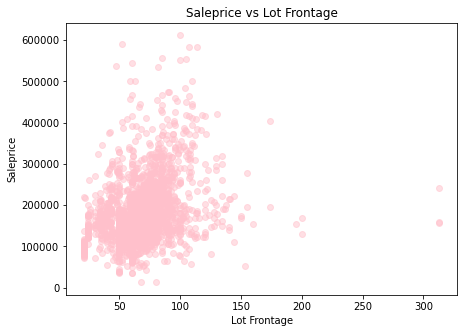

In [592]:
figure, ax = plt.subplots(1,1,figsize = (7,5))

ax.scatter(df['lot_frontage'], df['saleprice'],color='pink', alpha=0.5)
ax.set(xlabel='Lot Frontage',
          ylabel='Saleprice',
          title='Saleprice vs Lot Frontage')

plt.show()

### lot_area-continuous

In [593]:
df.lot_area.isnull().sum()

0

In [594]:
df[df.lot_area<0]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


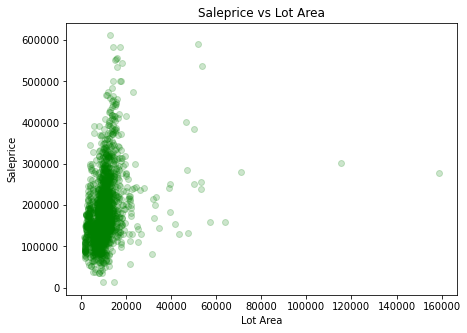

In [595]:
figure, ax = plt.subplots(1,1,figsize = (7,5))

ax.scatter(df['lot_area'], df['saleprice'],color='g', alpha=0.2)
ax.set(xlabel='Lot Area',
          ylabel='Saleprice',
          title='Saleprice vs Lot Area')

plt.show()

### street-nominal

In [596]:
df.street.unique()

array(['Pave', 'Grvl'], dtype=object)

In [597]:
df.street.isnull().sum()

0

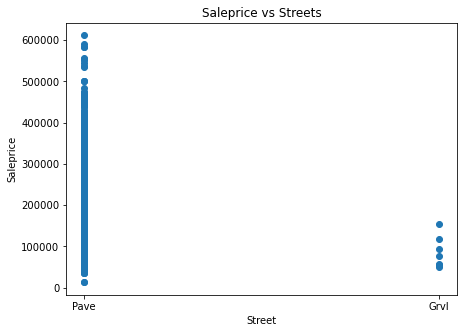

In [598]:
fig,ax=plt.subplots(1,1,figsize=(7,5))
ax.scatter(df['street'], df['saleprice'],label='scatter')
ax.set(xlabel='Street',
          ylabel='Saleprice',
          title='Saleprice vs Streets')
# my_labels=['Paved']
# ax.set_xticklabels(my_labels,
#                   rotation = 45,
#                   horizontalalignment = 'right')
plt.show()

### Alley (Nominal): Type of alley access to property

In [599]:
df.alley.unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [600]:
df.alley.value_counts()

Grvl    85
Pave    55
Name: alley, dtype: int64

In [601]:
df.alley.isnull().sum()#too many missing values so I will frop the entire column

1911

In [602]:
df.drop(columns='alley',inplace=True)

In [603]:
#

### Lot Shape (Ordinal): General shape of property

In [604]:
df.lot_shape.unique()

array(['IR1', 'Reg', 'IR2', 'IR3'], dtype=object)

In [605]:
df.lot_shape.isnull().sum()

0

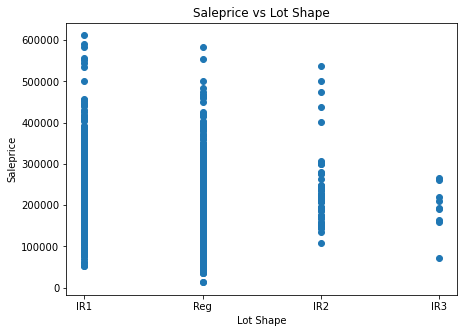

In [606]:
fig,ax=plt.subplots(1,1,figsize=(7,5))
ax.scatter(df['lot_shape'], df['saleprice'],label='scatter')
ax.set(xlabel='Lot Shape',
          ylabel='Saleprice',
          title='Saleprice vs Lot Shape');

### Land Contour (Nominal): Flatness of the property

In [607]:
df.land_contour.unique()

array(['Lvl', 'HLS', 'Bnk', 'Low'], dtype=object)

In [608]:
df.land_contour.isna().sum()

0

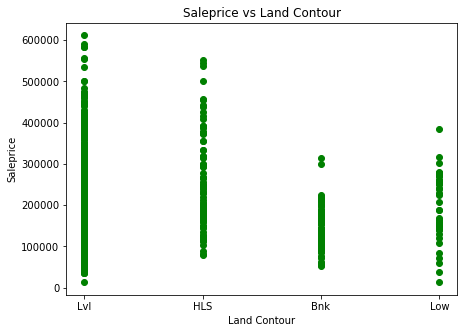

In [609]:
fig,ax=plt.subplots(1,1,figsize=(7,5))
ax.scatter(df['land_contour'], df['saleprice'],label='scatter', c='g')
ax.set(xlabel='Land Contour',
          ylabel='Saleprice',
          title='Saleprice vs Land Contour');

### Utilities (Ordinal): Type of utilities available

In [610]:
df.utilities.unique()

array(['AllPub', 'NoSeWa', 'NoSewr'], dtype=object)

In [611]:
df.utilities.value_counts()

AllPub    2049
NoSeWa       1
NoSewr       1
Name: utilities, dtype: int64

In [612]:
df.utilities.isna().sum()


0

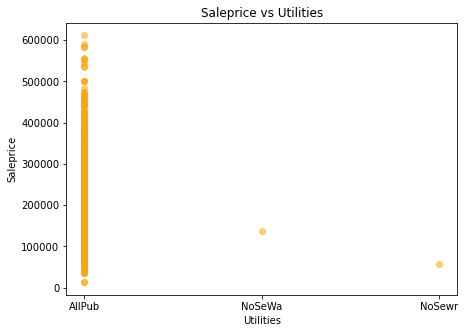

In [613]:
fig,ax=plt.subplots(1,1,figsize=(7,5))
ax.scatter(df['utilities'], df['saleprice'],label='scatter', c='orange', alpha=0.5)
ax.set(xlabel='Utilities',
          ylabel='Saleprice',
          title='Saleprice vs Utilities');

### Lot Config (Nominal): Lot configuration

In [614]:
df.lot_config.unique()

array(['CulDSac', 'Inside', 'Corner', 'FR2', 'FR3'], dtype=object)

In [615]:
df.lot_config.value_counts()

Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: lot_config, dtype: int64

In [616]:
df.lot_config.isna().sum()

0

Completed till now
- [x]'id'
- [x]'pid'
- [x]'ms_subclass'
- [x]'ms_zoning'
- [x]'lot_frontage'
- [x]'lot_area'
- [x]'street'
- [x]'lot_shape'
- [x]'land_contour'
- [x]'utilities'
- [x]'lot_config'

### Automation for other columns

In [617]:
nominal=['pid','ms_subclass','ms_zoning','street','alley','land_contour','lot_config','neighborhood','condition_1','condition_2', 'bldg_type',
       'house_style', 'overall_cond','roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type','foundation','heating','central_air',
        'garage_type','misc_feature','sale_type']
nominal_dict = {col: [] for col in nominal}
ordinal=['lot_shape','utilities','land_slope','overall_qual','overall_cond','exter_qual','exter_cond',
        'bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2',
         'heating_qc','electrical','kitchen_qual','functional','fireplace_qu',
         'garage_finish','garage_qual','garage_cond','paved_drive','pool_qc',
         'fence']
discrete =['year_built','year_remod/add','bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr','totrms_abvgrd',
          'fireplaces','garage_yr_blt','garage_cars','mo_sold', 'yr_sold']
continuous= ['lot_frontage','lot_area','mas_vnr_area','bsmtfin_sf_1',
             'bsmtfin_sf_2','bsmt_unf_sf', 'total_bsmt_sf','1st_flr_sf', 'flr2nd_sf', 'low_qual_fin_sf',
       'gr_liv_area','garage_area','wood_deck_sf', 'open_porch_sf', 'enclosed_porch', 'ssn3_porch',
       'screen_porch', 'pool_area','misc_val','saleprice']

In [618]:
#Checking for uncommong elements
#union
union = pd.Series(np.union1d(t, df.columns))
  
# intersection of the series
intersect = pd.Series(np.intersect1d(t, df.columns))
  
# uncommon elements in both the series 
notcommonseries = union[~union.isin(intersect)]
  
# displaying the result
print(notcommonseries)

1     alley
42       id
dtype: object


In [619]:
# for nominal entries

result = pd.DataFrame([[col, df[col].unique(),len(df[col].unique()), df[col].isnull().sum()] for col in nominal], columns=['column','unique_values','#unique_values','#missing_values'])
result

KeyError: 'alley'

In [ ]:
df.drop(columns='misc_feature',inplace=True)

**Misc Feature column dropped**

In [ ]:

#Neighbourhood-Nominal
string = """    Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       Greens	Greens
       GrnHill	Green Hills
       IDOTRR	Iowa DOT and Rail Road
       Landmrk	Landmark
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker"""

dict_neighborhood = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}



# result[]

In [ ]:
#Lot Config (Nominal): Lot configuration
string="""Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property"""   
dict_lot_config = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}


In [ ]:
#Condition 1 (Nominal): Proximity to various conditions

string="""Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad"""
dict_condition_1 = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}


In [ ]:
#Condition 2 (Nominal): Proximity to various conditions (if more than one is present)

string="""Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad""" 
dict_condition_2 = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_condition2

In [ ]:
#Land Slope (Ordinal): Slope of property
		
string="""Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope"""
	
dict_land_slope = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}

In [ ]:
#Bldg Type (Nominal): Type of dwelling
		
string="""1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit"""
	
dict_bldg_type = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}


In [ ]:
#House Style (Nominal): Style of dwelling
	
string="""1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level"""
dict_house_style = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_house_style

In [ ]:
#Overall Qual (Ordinal): Rates the overall material and finish of the house
string="""10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor"""
# [s.strip().split('\t') for s in string.split('\n')]
dict_overall_qual = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_overall_qual

In [ ]:
#Overall Cond (Ordinal): Rates the overall condition of the house

string="""10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor"""
dict_overall_cond = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_overall_cond

In [ ]:
#Roof Style (Nominal): Type of roof

string="""Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed"""
dict_roof_style = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_roof_style

In [ ]:
#Roof Matl (Nominal): Roof material

string="""ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles"""
dict_roof_mat1 = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_roof_mat1

In [ ]:
#Exterior 1 (Nominal): Exterior covering on house

string="""AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles"""
dict_exterior_1 = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_exterior_1

In [ ]:
#Exterior 2 (Nominal): Exterior covering on house (if more than one material)

string="""AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles"""
dict_exterior_2 = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_exterior_2

In [ ]:
#Mas Vnr Type (Nominal): Masonry veneer type

string="""BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone"""
dict_mas_vnr = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_mas_vnr

In [ ]:
#Exter Qual (Ordinal): Evaluates the quality of the material on the exterior 
		
string="""Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor"""
dict_exter_qual = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_exter_qual

In [ ]:
#Exter Cond (Ordinal): Evaluates the present condition of the material on the exterior

string="""Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor"""
dict_exter_cond = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_exter_cond

In [ ]:
#Foundation (Nominal): Type of foundation

string="""BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood"""
dict_foundation = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_foundation

In [ ]:
#Bsmt Qual (Ordinal): Evaluates the height of the basement

string="""Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement"""
dict_bsmt_qual = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_bsmt_qual

In [ ]:
#Bsmt Cond (Ordinal): Evaluates the general condition of the basement

string="""Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement"""
dict_bsmt_cond = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_bsmt_cond

In [ ]:
#Bsmt Exposure	(Ordinal): Refers to walkout or garden level walls

string="""Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement"""
dict_bsmt_exposure = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_bsmt_exposure

In [ ]:
#BsmtFin Type 1	(Ordinal): Rating of basement finished area

string="""GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement"""
dict_bsmt_fin_type1 = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_bsmt_fin_type1

In [ ]:
#BsmtFinType 2	(Ordinal): Rating of basement finished area (if multiple types)

string="""GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement"""
dict_bsmt_fin_type2 = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_bsmt_fin_type2

In [ ]:
#Heating	(Nominal): Type of heating

string="""Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace"""
dict_heating = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_heating

In [ ]:
#HeatingQC (Ordinal): Heating quality and condition

string="""Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor"""
dict_heatingQC = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_heatingQC

In [ ]:
#Central Air (Nominal): Central air conditioning

string="""N	No
       Y	Yes"""
dict_central_air = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_central_air

In [ ]:
#Electrical (Ordinal): Electrical system

string="""SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed"""
dict_electrical = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_electrical

In [ ]:
#KitchenQual (Ordinal): Kitchen quality

string="""Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor"""
dict_kitchen_qual = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_kitchen_qual

In [ ]:
#Functional (Ordinal): Home functionality (Assume typical unless deductions are warranted)

string="""Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only"""
dict_functional = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_functional

In [ ]:
#FireplaceQu (Ordinal): Fireplace quality

string="""Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace"""
dict_fireplaceQu = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_fireplaceQu

In [ ]:
#Garage Type (Nominal): Garage location

string="""2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage"""
dict_garage_type = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_garage_type

In [ ]:
#Garage Finish (Ordinal)	: Interior finish of the garage

string="""Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage"""
dict_garage_finish = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_garage_finish

In [ ]:
#Garage Qual (Ordinal): Garage quality

string="""Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage"""
dict_garage_qual = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_garage_qual

In [ ]:
#Garage Cond (Ordinal): Garage condition

string="""Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage"""
dict_garage_cond = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_garage_cond

In [ ]:
#Pool QC (Ordinal): Pool quality

string="""Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool"""
dict_pool_qc = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_pool_qc

In [ ]:
#Misc Feature (Nominal): Miscellaneous feature not covered in other categories
string="""Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None"""
dict_misc_feature = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_misc_feature

In [ ]:
#Sale Type (Nominal): Type of sale

string="""WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other""" 
dict_sale_type = {s.strip().split('\t')[0]:s.strip().split('\t')[1] for s in string.split("\n")}
# dict_sale_type.keys()

In [ ]:
value_validation_nominal={}
for col in nominal:
    try:
        keys = eval('dict_' + col).keys()
        flag = set(df[col].unique()).issubset(keys)
        value_validation_nominal[col] = flag
    except NameError:
        pass
value_validation_nominal


In [ ]:
t1 = set(df['neighborhood'].unique())
t2= set(dict_neighborhood.keys())
t1 - t2

In [ ]:
df.loc[df["neighborhood"] == "NAmes", "neighborhood"] = 'Names'

In [552]:
t1=set(df['bldg_type'].unique())


In [553]:
t2=set(dict_bldg_type.keys())
t2

{'1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI'}

In [554]:
df.loc[df["bldg_type"] == "Twnhs", "bldg_type"] = 'TwnhsE'

In [555]:
set(df['bldg_type'].unique())

{'1Fam', '2fmCon', 'Duplex', 'TwnhsE'}

In [494]:
t1=set(df['overall_cond'].unique())
t1

{1, 2, 3, 4, 5, 6, 7, 8, 9}

In [495]:
t2=set(dict_overall_cond.keys())
t2

{'1', '10', '2', '3', '4', '5', '6', '7', '8', '9'}

In [499]:
df['overall_cond']=df['overall_cond'].apply(lambda x: str(x))

In [500]:
set(df['overall_cond'].unique())


{'1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [502]:
t1=set(df['garage_type'].unique())
t1

{'2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', nan}

In [504]:
t2=set(dict_garage_type.keys())
t2

{'2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'NA'}

In [546]:
df.loc[df["garage_type"].isin(set(dict_garage_type.keys())) == False, "garage_type"] = 'NA'


In [547]:
set(df['garage_type'].unique())


{'2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'NA'}

In [551]:
value_validation_nominal={}
for col in nominal:
    try:
        keys = eval('dict_' + col).keys()
        flag = set(df[col].unique()).issubset(keys)
        value_validation_nominal[col] = flag
    except NameError :
        pass
    except KeyError:
        pass
value_validation_nominal


{'lot_config': True,
 'neighborhood': True,
 'condition_1': True,
 'condition_2': True,
 'bldg_type': False,
 'house_style': True,
 'overall_cond': True,
 'roof_style': True,
 'foundation': True,
 'heating': True,
 'central_air': True,
 'garage_type': True,
 'sale_type': True}